In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import main

 89%|████████▉ | 888890/1000000 [04:27<00:33, 3317.06it/s]


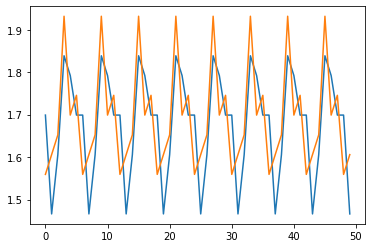

In [3]:
result = main.run(alpha = 0.125, beta = 1*1e-5)
agent_1 = np.array(result.price_history)[-50:,0]
agent_2 = np.array(result.price_history)[-50:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})

plt.plot(df)

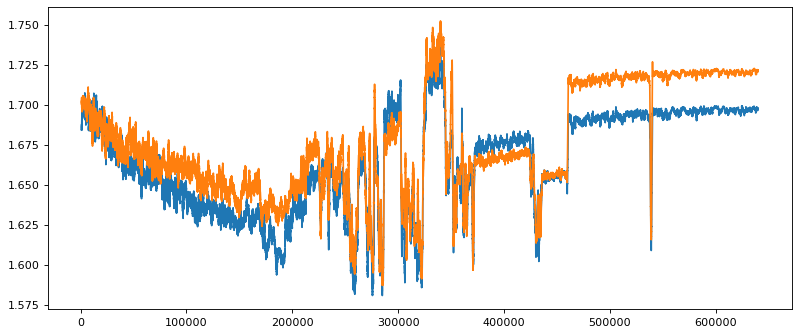

In [38]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

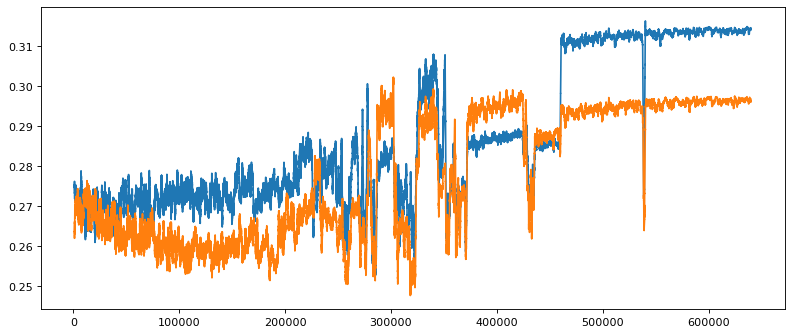

In [39]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [40]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())


 84%|████████▎ | 836801/1000000 [09:12<01:47, 1515.74it/s]


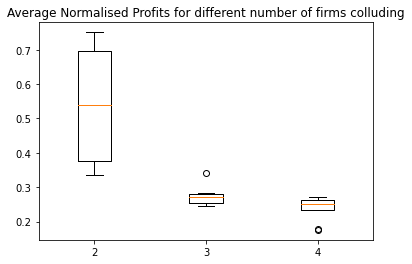

In [42]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

<ipython-input-41-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


Text(0.5, 1.0, 'Average normalised profits for a Grid of Values of $\\alpha$ and $\\beta$')

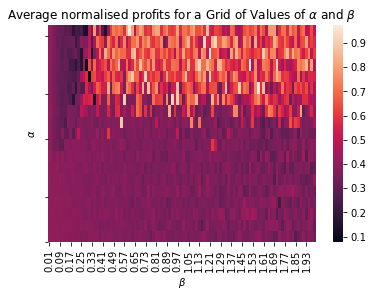

In [41]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')

# Deviation and Punishment    

Results of artificially making a firm deviate from converged pricing strategy. Showing 50 steps ahead upon introducing artificial price.

 80%|███████▉  | 795664/1000000 [03:54<01:00, 3398.18it/s]


Converged after 795614 period!
original: [1.69895138 1.79210269]
new: [1.37292183 1.79210269]


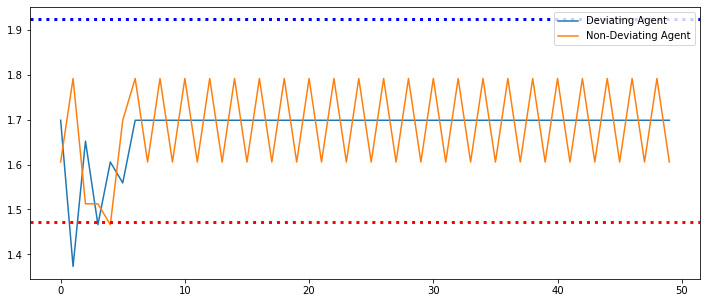

In [3]:


result = main.run(alpha = 0.125, beta = 1*1e-5)

agent_1 = np.array(result.price_history)[-50:,0]
agent_2 = np.array(result.price_history)[-50:,1]
df = pd.DataFrame({'Deviating Agent': agent_1, 'Non-Deviating Agent': agent_2})
df.plot(figsize=(12, 5))
plt.legend(loc=1)
plt.axhline(y=1.924,linewidth= 3, color='b', linestyle= 'dotted')
plt.axhline(y=1.472,linewidth= 3, color='r', linestyle= 'dotted')
plt.show()